In [1]:
import os, sys, re
import sqlite3, csv
import argparse
from tqdm.notebook import tqdm
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# %pip install ipywidgets
# %pip install seaborn

ModuleNotFoundError: No module named 'tqdm'

In [3]:
args = {
    "db": "/home/gjungwirth/data/02_data/results.db"
}

,cnt,num_rules
0,8522,1
1,2174,2
2,597,3
3,286,4
4,120,5
5,39,6
6,12,7
7,5,8
8,1,9
9,1,10


<AxesSubplot:xlabel='num_rules'>

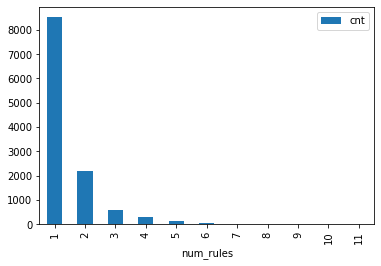

In [32]:
con = sqlite3.connect(args["db"])
df_secret_stats = pd.read_sql_query('select count(*) as cnt, num_rules from (select count(distinct s.rule) as num_rules from secret s natural join file f group by f.repo_id) group by num_rules',con)
display(df_secret_stats)
display(df_secret_stats.plot.bar(x='num_rules',y='cnt',logy=False))

,count,keylength
0,111,1024
1,1,1568
2,13,2047


<AxesSubplot:xlabel='keylength'>

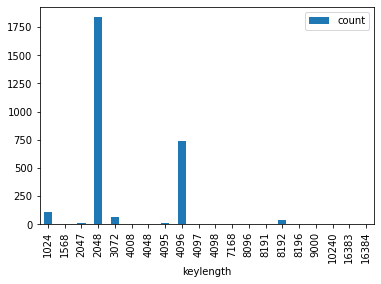

In [39]:
# cat ~/data/02_data/03_analyses/ssh-new-analysis/authorized_keys-keys | ssh-keygen -l -E md5 -f - | grep RSA | sort -u | awk '{print $1}' | sort -n | uniq -c | csvtool cat -t ' ' -u COMMA <(echo count keylength) - >03_analyses/ssh-new-analysis/authorized_keys-rsa-keylengths.csv

df_rsa_keylengths = pd.read_csv("/home/gjungwirth/data/02_data/03_analyses/ssh-new-analysis/authorized_keys-rsa-keylengths.csv")

display(df_rsa_keylengths.head(n=3))
display(df_rsa_keylengths.plot.bar(x='keylength',y='count'))#(x='num_rules',y='cnt',logy=False))

,count,noVulnTypes
0,76988,1
1,10859,2
2,1239,3


<AxesSubplot:xlabel='noVulnTypes'>

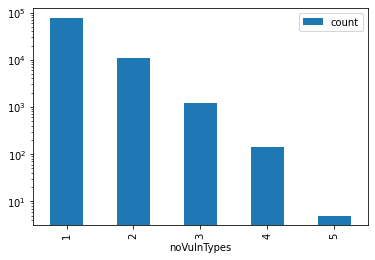

In [4]:
# cat 03_analyses/statistics_for_paper/venn_data/* | sort | uniq -c | csvtool col 1 -t ' ' - | sort | uniq -c | csvtool -t ' ' cat <(echo "count noVulnTypes") - >03_analyses/statistics_for_paper/overview_combined_vulnerabilities.csv

df_overall_combinations = pd.read_csv("/home/gjungwirth/data/02_data/03_analyses/statistics_for_paper/overview_combined_vulnerabilities.csv")

display(df_overall_combinations.head
display(df_overall_combinations.plot.bar(x='noVulnTypes',y='count',logy=True))#(x='num_rules',y='cnt',logy=False))